In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import optimize, stats
from scipy.interpolate import interp1d
import scipy
import pandas as pd
import matplotlib.ticker as ticker
from scipy.stats import f

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

Text(0.5, 0.92, 'Six-hump camelback function')

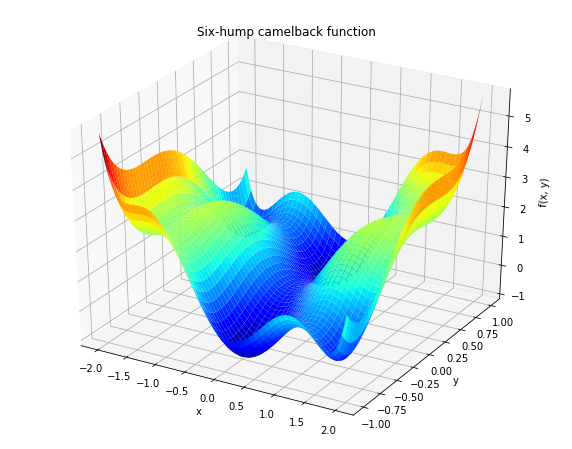

In [2]:
def func(x):
    func_val = (4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1]+ (-4 + 4*x[1]**2) * x[1] **2
    return func_val


x = np.linspace(-2, 2, 500)
y = np.linspace(-1, 1, 500)
x, y = np.meshgrid(x, y)
function = func([x,y])

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, function, cmap = plt.cm.jet)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Six-hump camelback function')

In [3]:
initial_guess = (3,4)
solution = optimize.minimize(func, x0 = initial_guess)
print(solution)
print(' ')

initial_guess = (-2,1)
solution = optimize.minimize(func, x0 = initial_guess)
print(solution)

      fun: 2.104250310311259
 hess_inv: array([[ 0.10524576, -0.0137983 ],
       [-0.0137983 ,  0.13821394]])
      jac: array([2.08616257e-07, 1.19209290e-07])
  message: 'Optimization terminated successfully.'
     nfev: 108
      nit: 22
     njev: 27
   status: 0
  success: True
        x: array([1.60710477, 0.56865146])
 
      fun: -1.0316284534898768
 hess_inv: array([[ 0.12921635, -0.00797436],
       [-0.00797436,  0.06140063]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 60
      nit: 12
     njev: 15
   status: 0
  success: True
        x: array([-0.08984202,  0.7126564 ])


In [4]:
print(f'The point {np.round(solution.x,4)} is the global minimum of the function, and the value is {np.round(solution.fun,4)}')
print(f'A wrong initial guess (3,4) could lead to a wrong minimum also in case the process ends with True')

The point [-0.0898  0.7127] is the global minimum of the function, and the value is -1.0316
A wrong initial guess (3,4) could lead to a wrong minimum also in case the process ends with True


In [5]:
methods = ['Nelder-Mead', 'CG', 'BFGS', 'L-BFGS-B', 'TNC', 'COBYLA' , 'SLSQP', 'Powell']
initial_guess = (-2,1)

for met in methods:
    solution = optimize.minimize(func, x0 = initial_guess, method = met)
    print(f'Using the {met} method with intial value {initial_guess}')
    print(f'The point of minimun is {solution.x} and the value is {solution.fun}')
    print(f'The process ends with {solution.success}')
    print(' ')

initial_guess = (3,4)

for met in methods:
    solution = optimize.minimize(func, x0 = initial_guess, method = met)
    print(f'Using the {met} method with intial value {initial_guess}')
    print(f'The point of minimun is {solution.x} and the value is {solution.fun}')
    print(f'The process ends with {solution.success}')
    print(' ')

Using the Nelder-Mead method with intial value (-2, 1)
The point of minimun is [-1.70360118  0.79612308] and the value is -0.21546380637142593
The process ends with True
 
Using the CG method with intial value (-2, 1)
The point of minimun is [-0.08984197  0.71265662] and the value is -1.0316284534894626
The process ends with True
 
Using the BFGS method with intial value (-2, 1)
The point of minimun is [-0.08984202  0.7126564 ] and the value is -1.0316284534898768
The process ends with True
 
Using the L-BFGS-B method with intial value (-2, 1)
The point of minimun is [ 1.70360669 -0.79608358] and the value is -0.2154638243837127
The process ends with True
 
Using the TNC method with intial value (-2, 1)
The point of minimun is [-1.70359685  0.79609637] and the value is -0.2154638214913407
The process ends with True
 
Using the COBYLA method with intial value (-2, 1)
The point of minimun is [-0.08984266  0.71269995] and the value is -1.0316284379837182
The process ends with True
 
Using

In [6]:
print('Looking at the obtained result we can observe that if we use the initial guess (-2,1), that previously lead us to the correcr solution, when using Nelder-Mead, L-BFGS-B, TNC and SLSQP method we have an incorrect minumum. However, the incorrect value is the same in all cases.')
print(' ')
print('If we use the initial guess (3,4), that without any method lead us to an incorrect value, now with Nelder-Mead, TNC,COBYLA and SLSQP, we find the correct one')
print(' ')
print('In all cases the process ends with a success')
print('Then looking at the minimum point, we have two different global minimum: [-0.08987921  0.71274446] and [0.08987921  -0.71274446]')

Looking at the obtained result we can observe that if we use the initial guess (-2,1), that previously lead us to the correcr solution, when using Nelder-Mead, L-BFGS-B, TNC and SLSQP method we have an incorrect minumum. However, the incorrect value is the same in all cases.
 
If we use the initial guess (3,4), that without any method lead us to an incorrect value, now with Nelder-Mead, TNC,COBYLA and SLSQP, we find the correct one
 
In all cases the process ends with a success
Then looking at the minimum point, we have two different global minimum: [-0.08987921  0.71274446] and [0.08987921  -0.71274446]


In [7]:
initial_guess = (0,0)
solution = optimize.minimize(func, x0 = initial_guess)
print(solution)
print(f'If we set the initial guess to {initial_guess} the algorithm says to end succesfully')
print(f'However, it remain fixed in the initial guess and no iteration are performed: nit = {solution.nit}')

      fun: 0.0
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([ 5.96046448e-08, -5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0., 0.])
If we set the initial guess to (0, 0) the algorithm says to end succesfully
However, it remain fixed in the initial guess and no iteration are performed: nit = 0


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

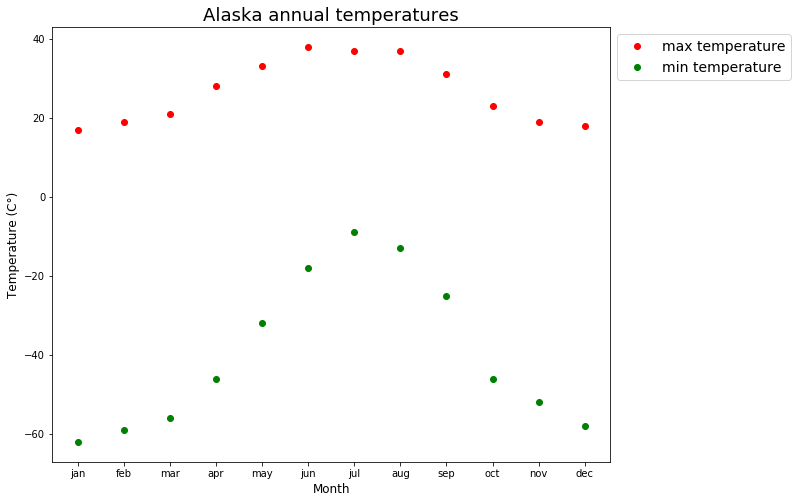

In [8]:
max_t = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
min_t = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
month_line = np.arange(12)
labels = ['jan','feb','mar','apr','may','jun', 'jul','aug','sep', 'oct', 'nov', 'dec']

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)
ax.plot(month_line, max_t, 'ro', color = 'red', label = 'max temperature')
ax.plot(month_line,min_t, 'ro', color = 'green', label = 'min temperature')
ax.set_xticks(month_line)
ax.set_xticklabels(labels)
ax.set_xlabel('Month', fontsize = 12)
ax.set_ylabel('Temperature (C°)', fontsize = 12)
ax.set_title('Alaska annual temperatures', fontsize = 18)
ax.legend(fontsize = 14, loc = 'upper left', bbox_to_anchor=(1, 1))

In [9]:
max_interp = interp1d(month_line, max_t, kind='quadratic')
min_interp = interp1d(month_line, min_t, kind='quadratic')

days = np.linspace(0, 11, num = 365)

max_res = max_interp(days)
min_res = min_interp(days)

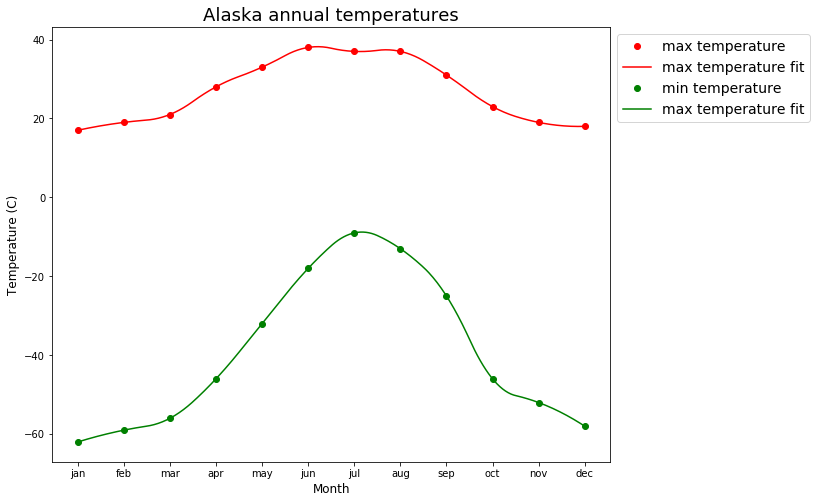

In [10]:
days = np.linspace(0, 11, num = 365)
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)
ax.plot(month_line, max_t, 'ro', color = 'red', label = 'max temperature')
ax.plot(days, max_res, 'r-', label = 'max temperature fit')
ax.plot(month_line, min_t, 'ro', color = 'green', label = 'min temperature')
ax.plot(days, min_res, 'g-', label = 'max temperature fit')
ax.set_xlabel('Month', fontsize = 12)
ax.set_ylabel('Temperature (C)', fontsize = 12)
ax.set_xticks(month_line)
ax.set_xticklabels(labels)
ax.set_title('Alaska annual temperatures', fontsize = 18)
ax.legend(fontsize = 14, loc = 'upper left', bbox_to_anchor=(1, 1))

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [11]:
data = np.load('data/residuals_261.pkl', allow_pickle = "true").item()
data = pd.DataFrame(data)
data = data[data['residuals'].abs() < 2]
data = data['residuals']

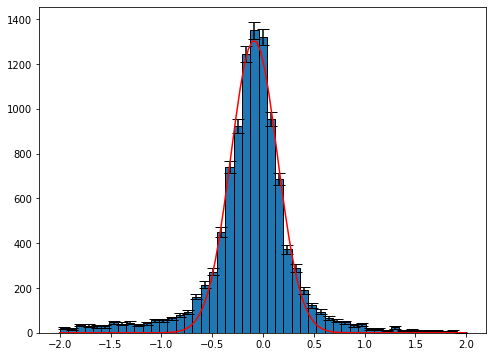

In [12]:
fig, ax = plt.subplots(figsize = (8,6))
y, bincenter, _ = ax.hist(data, bins = np.linspace(min(data), max(data)),  edgecolor = "black")
bincenters = 0.5*(bincenter[1:] + bincenter[:-1])
yerr = np.sqrt(np.abs(y))
ax.errorbar(bincenters, y, yerr, fmt = 'none', c = 'black', capsize = 6)


def gauss(x, scale, mean ,sigma):
    return scale*np.exp(-((x-mean)**2/(sigma**2)))

fit = optimize.curve_fit(gauss, bincenters, y, p0 = [5000, 0, 1], full_output=False)
x_line = np.linspace(bincenter[0], bincenter[-1], 100)
ax.plot(x_line, gauss(x_line, (fit[0])[0], (fit[0])[1],(fit[0])[2]), 'r')
plt.show()

In [13]:
ndof = len(bincenters) - 1
chi2 = np.sum(((y - gauss(bincenters, (fit[0])[0], (fit[0])[1],(fit[0])[2]))**2) / yerr)
p_value = 1. - stats.chi2.cdf(chi2, ndof)

print(f'The chi2 value is {chi2}')
print(f'The p-value is {p_value}') 

The chi2 value is 10440.81314348149
The p-value is 0.0


4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [14]:
#!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt

In [15]:
data = pd.read_csv('data/munich_temperatures_average_with_bad_data.txt', sep = ' ', header = None, names = ['Day', 'Temperature'])
data['year'] = data['Day'].astype(str).str[:4].astype(int)
data_filt = data.loc[(data['year'] >= 2008) & (data['year'] < 2012)]
data_filt.head()

,Day,Temperature,year
4748,2008.00274,-2.94444,2008
4749,2008.00548,-2.66667,2008
4750,2008.00821,-2.66667,2008
4751,2008.01095,-2.00000,2008
4752,2008.01369,-1.94444,2008


The best fit values parameters are a = -9.99, b = -0.23 and c = 9.38
The overall average temperature is 9.38 grades
The typical daily average values predicted by the model for the coldest and hottest time of year are -0.6 and 19.37
The b parameter is the phase of the cosine function


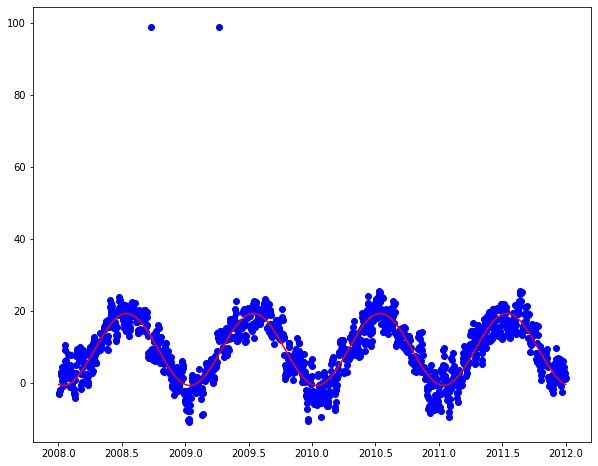

In [16]:
def func(t, a, b, c):
    f = a * np.cos(2*np.pi*t+b) + c
    return f

time = np.linspace(2008, 2012, num = len(data_filt))
f_popt, f_pcov = optimize.curve_fit(func, data_filt['Day'], data_filt['Temperature'], p0=[0,0,0], full_output=False)

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)
ax.plot(data_filt['Day'], data_filt['Temperature'], 'ro', color = 'blue', label = 'max temperature')
ax.plot(time, func(time, *f_popt),color = 'red', label='fitted function')

print(f'The best fit values parameters are a = {round(f_popt[0],2)}, b = {round(f_popt[1],2)} and c = {round(f_popt[2],2)}')

temperature = round(data_filt['Temperature'].mean(),2)
print(f'The overall average temperature is {temperature} grades')

min_temp = round(func(time, *f_popt).min(),2)
max_temp = round(func(time, *f_popt).max(),2)
print(f'The typical daily average values predicted by the model for the coldest and hottest time of year are {min_temp} and {max_temp}')


print('The b parameter is the phase of the cosine function')

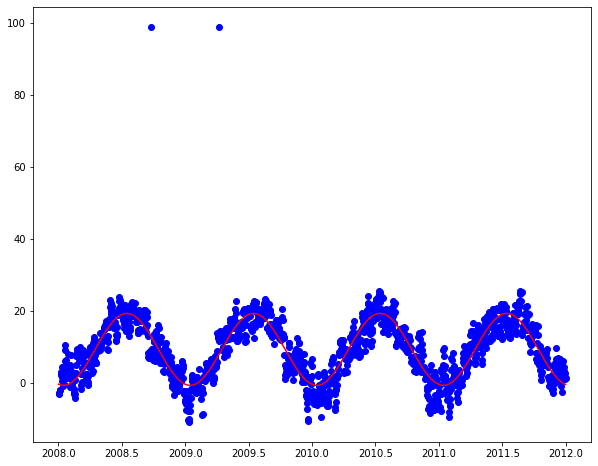

In [17]:
def g_func(t, a, b, c, d):
    f = a * np.cos(2*np.pi*t*b + c) + d
    return f

time = np.linspace(2008, 2012, num = len(data_filt))
g_popt, g_pcov = optimize.curve_fit(g_func, data_filt['Day'], data_filt['Temperature'], p0=[1,1,1,1], full_output=False)

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)
ax.plot(data_filt['Day'], data_filt['Temperature'], 'ro', color = 'blue', label = 'max temperature')
ax.plot(time, g_func(time, *g_popt),color = 'red', label='fitted function')

In [18]:
N = len(data_filt)

y_data_opt_f = func(time, *f_popt)
res_f = data_filt['Temperature'] - y_data_opt_f
sr_f = np.sum(res_f**2)


y_data_opt_g = g_func(time, *g_popt)
res_g = data_filt['Temperature'] - y_data_opt_g
sr_g = np.sum(res_g**2)


print(f'The RSS values for f and g are {round(sr_f,2)} and {round(sr_g,2)} respectively')

The RSS values for f and g are 34343.64 and 34344.17 respectively


In [19]:
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL

cl_1_vs_2 = Ftest(sr_f, sr_g, 3, 4, N, verbose=True)

CL: 1.000 , additional parameter necessary: NO
